In [1]:
import torch
import math
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
from ridesharing_simulation import *

In [3]:
T0_pricing_params = (5, 0.78, 1.82)
lr = 0.01
simulation_week1 = WeeklySimulation(lr, T0_pricing_params)

In [4]:
drivers_week1_d0 = simulation_week1.simulate_supply()

In [5]:
requests_week1_d0 = simulation_week1.simulate_demand()

In [6]:
drivers_week1_d0.size(), requests_week1_d0.size()

(torch.Size([100, 6]), torch.Size([981, 8]))

In [7]:
simulation_week1.request_driver_matching()

0it [00:00, ?it/s]

48it [00:00, 756.72it/s]


#### test on a week(7 days)

In [4]:
for d in range(1):
    print(f'simulation on day {d}')
    drivers_week1_today = simulation_week1.simulate_supply()
    requests_week1_today = simulation_week1.simulate_demand()
    print(f'drivers_week1_today.size():{drivers_week1_today.size()}')
    print(f'requests_week1_today.size():{requests_week1_today.size()}')
    simulation_week1.request_driver_matching()
    simulation_week1.update_gamma_distns()
    simulation_week1.current_day += 1

simulation on day 0
drivers_week1_today.size():torch.Size([100, 6])
requests_week1_today.size():torch.Size([1082, 8])


0it [00:00, ?it/s]

48it [00:00, 858.94it/s]


Text(0.5, 0, 'Bins')

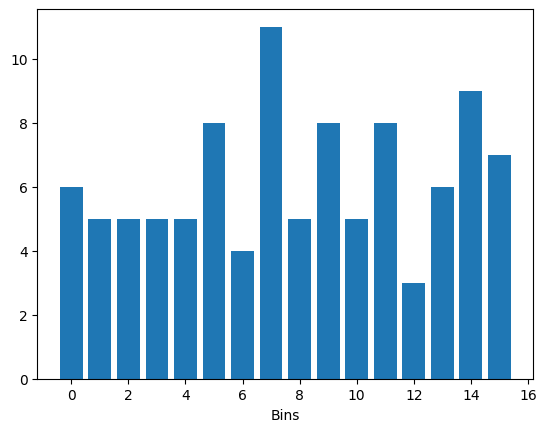

In [8]:
bins = 16
hist = torch.histc(torch.randint(0, 16, (100,)).float(), bins = bins, min = 0, max = 15)

x = range(bins)
plt.bar(x, hist, align='center')
plt.xlabel('Bins')

In [23]:
# log_normal_dist = torch.distributions.log_normal.LogNormal(5, 2.5)

# # Sample durations from the log-normal distribution
# # .clamp(min=30, max=24*60)
# idle_duration = log_normal_dist.sample((1000,)).clamp(min=2*60, max=24*60).int().long()

In [15]:
exponential_dist = torch.distributions.exponential.Exponential(torch.tensor(1.0 / 480))

# don't do resampling for now to save runtime, shift the exp var to have a minimum value
idle_duration = (exponential_dist.sample((100,)) + 120).clamp(min=1, max=24 * 60).int().long()

In [16]:
idle_duration

tensor([ 653, 1440, 1440,  794,  961,  686, 1440,  140,  186,  682, 1105,  669,
        1440,  197,  653,  325,  164,  790,  239,  904,  848,  936,  232,  408,
         560,  178,  983,  123,  409, 1037,  360,  192,  326,  243,  705,  229,
         166,  454, 1001,  152,  563,  186,  159,  561,  336, 1077,  223,  326,
         362, 1390,  687,  506,  385,  290,  193, 1404,  124,  467,  741,  809,
        1440,  455,  761, 1060,  352, 1440,  306,  207,  461,  385, 1440,  657,
         496,  329,  230,  164,  731,  816,  127,  585,  998,  317,  976,  229,
         571,  880,  330,  467,  905,  667,  344,  897,  518,  240,  396,  120,
         156,  275, 1440,  408])

In [34]:
mean_idle_time = 600 
#epsilon = 1e-6

In [35]:
# lambda_value = 1.0 / (mean_idle_time)  # λ for exponential distribution, epsilon
# exponential_dist = torch.distributions.Exponential(torch.tensor(lambda_value))
# idle_duration = exponential_dist.sample((100,)).clamp(min=4*60, max=24*60).int().long()

In [36]:
idle_duration

tensor([ 355,  240,  711, 1440,  784,  260,  373,  792, 1440,  420,  240,  484,
        1440, 1440,  294,  594,  240,  837,  911,  240, 1052,  591,  464,  591,
        1440, 1440,  313,  754,  336,  240, 1440,  724,  240,  240,  513,  326,
         488, 1434,  663,  240,  317,  528,  531,  240, 1154,  290,  240,  776,
         873,  240, 1316,  240,  240,  240, 1216,  240, 1440,  240,  377,  240,
         595,  914,  364,  240,  649,  240,  240, 1440, 1440,  527,  581, 1156,
         240, 1011, 1069,  240,  240,  686,  457,  240, 1440,  758,  800,  240,
         240, 1440,  240,  240,  340,  248,  489,  786,  316,  374,  240,  248,
         245,  897,  463,  357])

Text(0.5, 0, 'Bins')

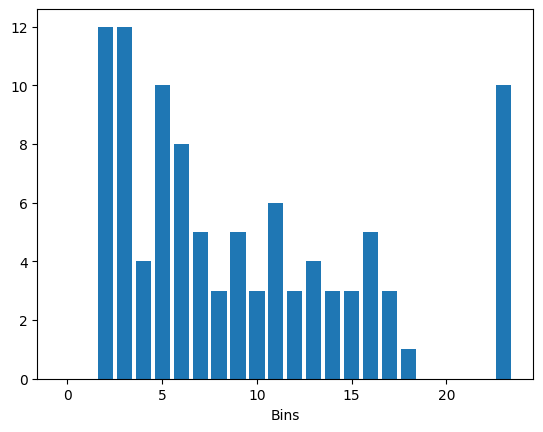

In [17]:
bins = 24
hist = torch.histc(idle_duration.float(), bins = bins, min=0, max=24*60)

x = range(bins)
plt.bar(x, hist, align='center')
plt.xlabel('Bins')

In [8]:
driver_idle_timestamps = simulation_week1.S_Drivers[:, 0]

In [14]:
driver_idle_timestamps.int()

tensor([1200,  420,  540,  420,  780,  900,  887, 1027,  540,  600,  900, 1200,
        1136,  540,  840,  960, 1248, 1320,  533,  600,  660,  840,  120, 1080,
         780,  660, 1260, 1320, 1446, 1200, 1080,  411,  960, 1320,  960, 1140,
         480, 1260, 1260, 1020, 1020,  960, 1020,  742, 1260, 1423,  606,  600,
        1140,  540, 1260,  960,  300, 1140,  840, 1140,  615, 1140, 1200, 1200,
        1080,  660,  900,  780,  540, 1200,  600,  957,  960, 1140,  480, 1320,
         600,  121,  540,  420, 1140, 1140,  882,  837,  960,  840,  480,  535,
         420,  780,  120,  360, 1260,  720,  420,  606,  480, 1140,  720, 1380,
        1080,  540,  207,   60], dtype=torch.int32)

In [10]:
driver_idle_duration = simulation_week1.S_Drivers[:, 1]

In [15]:
driver_idle_duration.int()

tensor([ 975, 1230,  208,  315,  393,  285,  724, 1034,  258,  564,  325,  206,
         797,  128,  167,  201,  449,  517,  169,  157, 1009, 1023,  433,  962,
        1198,  945,  884,  313,  480, 1440, 1009,  316,  220,  512,  174, 1440,
         206,  453,  693,  648,  314,  186,  340,  773,  303, 1398,  200,  259,
        1130, 1440,  354, 1440,  380,  431,  134,  534,  324,  192, 1440, 1440,
         231,  351, 1440,  836,  124,  841,  316,  825,  377,  673,  290, 1440,
         235,  896,  235,  210, 1440,  140,  942,  675, 1200,  373,  189,  819,
         401,  364,  701, 1440,  857,  199,  342,  137,  397,  212,  537, 1167,
         773,  560,  253, 1089], dtype=torch.int32)

In [19]:
simulation_week1.daily_num_requests.mean(), simulation_week1.daily_rider_accepts.mean()

(tensor(0.9810), tensor(0.1010))

In [21]:
simulation_week1.daily_rider_accepts

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 2., 0., 0., 

In [18]:
simulation_week1.daily_driver_rejects.mean()

tensor(0.1200)

Text(0.5, 0, 'Bins')

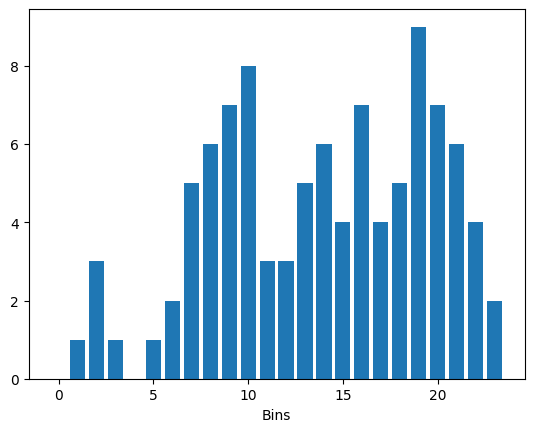

In [12]:
bins = 24
hist = torch.histc(driver_idle_timestamps, bins = bins, min = 0, max = 24*60)

x = range(bins)
plt.bar(x, hist, align='center')
plt.xlabel('Bins')

Text(0.5, 0, 'Bins')

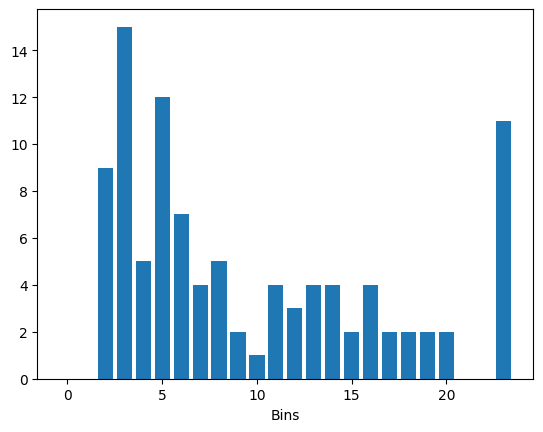

In [13]:
bins = 24
hist = torch.histc(driver_idle_duration, bins = bins, min=0, max=24*60)

x = range(bins)
plt.bar(x, hist, align='center')
plt.xlabel('Bins')

In [12]:
driver_idle_duration.mean(), driver_idle_duration.std()

(tensor(284.9100), tensor(387.7381))

In [52]:
num_drivers = 100
mean_idle_time = 8*60
exponential_dist = torch.distributions.exponential.Exponential(torch.tensor(1.0 / mean_idle_time))

In [53]:
idle_duration = exponential_dist.sample((num_drivers,)).clamp(min=30, max=24 * 60).int().long()

In [54]:
idle_duration

tensor([ 313,  238,  170,   30,  170, 1440,  293,  199, 1440,  139,  209,  128,
        1055,  223,  468,  270, 1122,  407,  168,  313,   77,  941,  370,  776,
         161,   52,  312,  642,  116, 1314, 1389,   47,  598,  244,  268,  465,
         195,   92,   66,  710,  184,  771, 1052,   91,  131,  104,  138,  277,
         128,  238,  472,  243,  414,  158,  230,  339,  547,  367,  288,  629,
         142,  319,   79,  106,  381,   92,   76,  237, 1251,   30, 1440,  128,
          30,  332,  515,   77,  115, 1440,  619,   30,   30,  261,   98,  712,
         591,  273,   30,   66,  226, 1104,  132,   52,  219, 1069,  306,   77,
         133,   30, 1187,  216])

Text(0.5, 0, 'Bins')

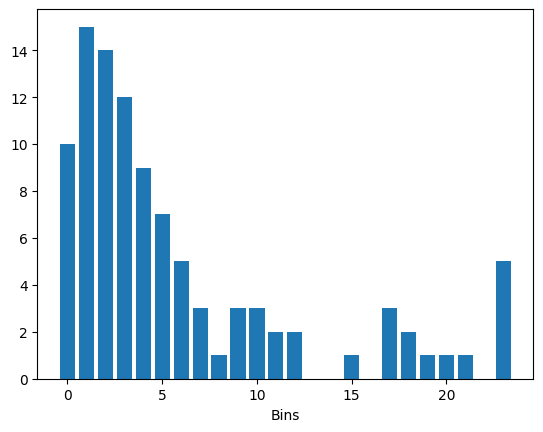

In [55]:
bins = 24
hist = torch.histc(idle_duration.float(), bins = bins, min = 0, max = 24*60)

x = range(bins)
plt.bar(x, hist, align='center')
plt.xlabel('Bins')


In [4]:
for d in range(7):
    print(f'simulation on day {d}')
    drivers_week1_today = simulation_week1.simulate_supply()
    requests_week1_today = simulation_week1.simulate_demand()
    print(f'drivers_week1_today.size():{drivers_week1_today.size()}')
    print(f'requests_week1_today.size():{requests_week1_today.size()}')
    simulation_week1.request_driver_matching()
    simulation_week1.update_gamma_distns()
    simulation_week1.current_day += 1

simulation on day 0
drivers_week1_today.size():torch.Size([100, 6])
requests_week1_today.size():torch.Size([989, 8])


48it [00:00, 943.86it/s]


simulation on day 1
drivers_week1_today.size():torch.Size([100, 6])
requests_week1_today.size():torch.Size([1027, 8])


0it [00:00, ?it/s]

48it [00:00, 950.23it/s]


simulation on day 2
drivers_week1_today.size():torch.Size([100, 6])
requests_week1_today.size():torch.Size([1093, 8])


48it [00:00, 1070.40it/s]


simulation on day 3
drivers_week1_today.size():torch.Size([100, 6])
requests_week1_today.size():torch.Size([992, 8])


48it [00:00, 1378.32it/s]


simulation on day 4
drivers_week1_today.size():torch.Size([100, 6])
requests_week1_today.size():torch.Size([1020, 8])


48it [00:00, 1057.20it/s]


simulation on day 5
drivers_week1_today.size():torch.Size([100, 6])
requests_week1_today.size():torch.Size([988, 8])


48it [00:00, 834.17it/s]


simulation on day 6
drivers_week1_today.size():torch.Size([100, 6])
requests_week1_today.size():torch.Size([1016, 8])


48it [00:00, 627.69it/s]
